Saving grayscale.png to grayscale.png


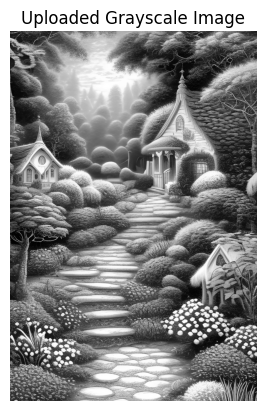

In [ ]:
from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt

uploaded = files.upload()

filename = next(iter(uploaded))

file_bytes = np.asarray(bytearray(uploaded[filename]), dtype=np.uint8)
img = cv2.imdecode(file_bytes, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Uploaded Grayscale Image")
plt.axis('off')
plt.show()


Histogram equalization


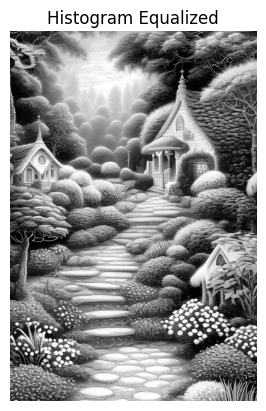

In [ ]:
equalized = cv2.equalizeHist(img)

plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')
plt.show()

Piecewise Linear

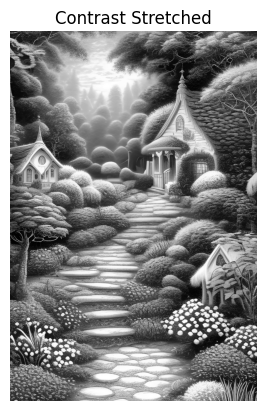

In [ ]:
def contrast_stretch(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * (255 / (max_val - min_val))
    return stretched.astype(np.uint8)

stretched = contrast_stretch(img)

plt.imshow(stretched, cmap='gray')
plt.title("Contrast Stretched")
plt.axis('off')
plt.show()

Gray Level Slicing

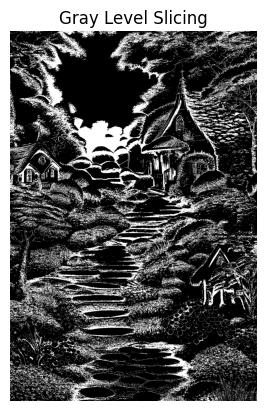

In [ ]:
def gray_level_slicing(image, low, high):
    sliced = np.where((image >= low) & (image <= high), 255, 0)
    return sliced.astype(np.uint8)

sliced = gray_level_slicing(img, 100, 150)

plt.imshow(sliced, cmap='gray')
plt.title("Gray Level Slicing")
plt.axis('off')
plt.show()

Bit Plane Slicing

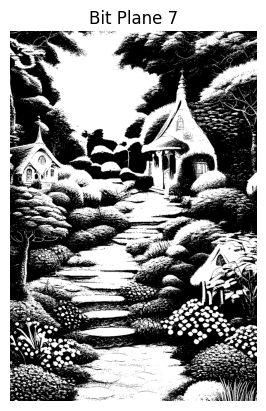

In [ ]:
def bit_plane(image, bit):
    return ((image >> bit) & 1) * 255

bit_7 = bit_plane(img, 7)

plt.imshow(bit_7, cmap='gray')
plt.title("Bit Plane 7")
plt.axis('off')
plt.show()

Histogram Matching

Saving Screenshot 2025-09-23 105736.png to Screenshot 2025-09-23 105736 (1).png
Upload reference image...


Saving grayscale.png to grayscale (2).png


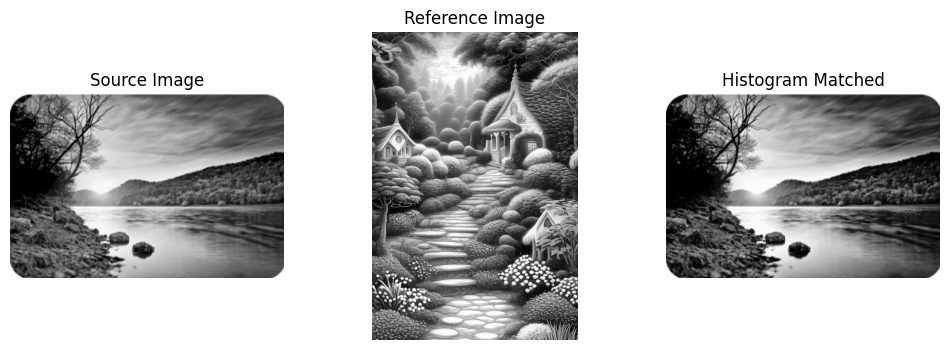

In [ ]:
from skimage import exposure
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

uploaded = files.upload()
source_filename = next(iter(uploaded))
source_bytes = np.asarray(bytearray(uploaded[source_filename]), dtype=np.uint8)
source = cv2.imdecode(source_bytes, cv2.IMREAD_GRAYSCALE)

print("Upload reference image...")
uploaded_ref = files.upload()
ref_filename = next(iter(uploaded_ref))
ref_bytes = np.asarray(bytearray(uploaded_ref[ref_filename]), dtype=np.uint8)
reference = cv2.imdecode(ref_bytes, cv2.IMREAD_GRAYSCALE)

matched = exposure.match_histograms(source, reference, channel_axis=None)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(source, cmap='gray')
plt.title("Source Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(reference, cmap='gray')
plt.title("Reference Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(matched, cmap='gray')
plt.title("Histogram Matched")
plt.axis('off')

plt.show()